Link dataset https://www.kaggle.com/datasets/jeffheaton/is-a-block-structure-stable-or-unstable

In [1]:
import zipfile
import os
import json
import pandas as pd
from pathlib import Path
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from tqdm import tqdm
from PIL import Image
import cv2

2024-06-12 18:51:52.958159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt



# Caricamento Dataset da Kaggle

In [21]:
!pip install kaggle


In [22]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/ProgettoML/kaggle.json"

In [23]:
!kaggle datasets download -d jeffheaton/is-a-block-structure-stable-or-unstable

Traceback (most recent call last):
  File "/Users/stefanomorelli/Documents/Istruzione/Università/A.A 2023-2024/Machine Learning/ProgettoMl/.conda/bin/kaggle", line 7, in <module>
    from kaggle.cli import main
  File "/Users/stefanomorelli/Documents/Istruzione/Università/A.A 2023-2024/Machine Learning/ProgettoMl/.conda/lib/python3.10/site-packages/kaggle/__init__.py", line 3, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/Users/stefanomorelli/Documents/Istruzione/Università/A.A 2023-2024/Machine Learning/ProgettoMl/.conda/lib/python3.10/site-packages/kaggle/api/__init__.py", line 6, in <module>
    from kaggle.api.kaggle_api_extended import KaggleApi
  File "/Users/stefanomorelli/Documents/Istruzione/Università/A.A 2023-2024/Machine Learning/ProgettoMl/.conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 258, in <module>
    class KaggleApi(KaggleApi):
  File "/Users/stefanomorelli/Documents/Istruzione/Università/A.A 2023-202

In [24]:


# Define the path to your zip file
file_path = "/content/is-a-block-structure-stable-or-unstable.zip" # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/ProgettoML/Dati')  # Replace 'destination_folder' with your desired folder

FileNotFoundError: [Errno 2] No such file or directory: '/content/is-a-block-structure-stable-or-unstable.zip'

# Caricamento dati

In [55]:
import os
import numpy as np
import cv2
from tqdm import tqdm

import os
import numpy as np
import cv2

def load_data(data_dir):
    images = []
    labels = []

    for root, dirs, files in os.walk(data_dir):
        for label_dir in dirs:
            label = os.path.basename(label_dir)
            label_path = os.path.join(root, label_dir)
            print(f"Caricamento della cartella {label}...")
            for image_file in os.listdir(label_path):
                if image_file.endswith('.jpg') or image_file.endswith('.png'):
                    image_path = os.path.join(label_path, image_file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, (64, 64))
                       
                        images.append(image)
                        labels.append(label)
            print(f"Caricamento della cartella {label} completato.")

    return np.array(images), np.array(labels)

# Esempio di utilizzo della funzione
train_dir = 'percorso/alla/cartella/train'
test_dir = 'percorso/alla/cartella/test'

train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)


# Esempio di utilizzo della funzione
train_dir_2 = 'dataset/asl_alphabet_train'
test_dir = 'dataset/asl_alphabet_test'
train_dir = "dataset2/Train_Alphabet"
train_images, train_labels = load_data(train_dir)
#test_images, test_labels = load_data(test_dir)


Caricamento della cartella R...
Caricamento della cartella R completato.
Caricamento della cartella U...
Caricamento della cartella U completato.
Caricamento della cartella I...
Caricamento della cartella I completato.
Caricamento della cartella N...
Caricamento della cartella N completato.
Caricamento della cartella G...
Caricamento della cartella G completato.
Caricamento della cartella Z...
Caricamento della cartella Z completato.
Caricamento della cartella T...
Caricamento della cartella T completato.
Caricamento della cartella S...
Caricamento della cartella S completato.
Caricamento della cartella A...
Caricamento della cartella A completato.
Caricamento della cartella F...
Caricamento della cartella F completato.
Caricamento della cartella O...
Caricamento della cartella O completato.
Caricamento della cartella H...
Caricamento della cartella H completato.
Caricamento della cartella nothing...
Caricamento della cartella nothing completato.
Caricamento della cartella M...
Caricam

In [58]:
train_images_2 , train_labels_2 = load_data(train_dir_2)

Caricamento della cartella asl_alphabet_train...
Caricamento della cartella asl_alphabet_train completato.
Caricamento della cartella R...
Caricamento della cartella R completato.
Caricamento della cartella U...
Caricamento della cartella U completato.
Caricamento della cartella I...
Caricamento della cartella I completato.
Caricamento della cartella N...
Caricamento della cartella N completato.
Caricamento della cartella G...
Caricamento della cartella G completato.
Caricamento della cartella Z...
Caricamento della cartella Z completato.
Caricamento della cartella T...
Caricamento della cartella T completato.
Caricamento della cartella S...
Caricamento della cartella S completato.
Caricamento della cartella A...
Caricamento della cartella A completato.
Caricamento della cartella F...
Caricamento della cartella F completato.
Caricamento della cartella O...
Caricamento della cartella O completato.
Caricamento della cartella H...
Caricamento della cartella H completato.
Caricamento della

In [60]:
train_images=np.vstack((train_images, train_images_2))

In [69]:
train_labels= np.concatenate((train_labels,train_labels_2))

In [67]:
test_images, test_labels = load_data(test_dir)

Caricamento della cartella asl_alphabet_test...
Caricamento della cartella asl_alphabet_test completato.
Caricamento della cartella R...
Caricamento della cartella R completato.
Caricamento della cartella U...
Caricamento della cartella U completato.
Caricamento della cartella I...
Caricamento della cartella I completato.
Caricamento della cartella N...
Caricamento della cartella N completato.
Caricamento della cartella G...
Caricamento della cartella G completato.
Caricamento della cartella Z...
Caricamento della cartella Z completato.
Caricamento della cartella T...
Caricamento della cartella T completato.
Caricamento della cartella S...
Caricamento della cartella S completato.
Caricamento della cartella A...
Caricamento della cartella A completato.
Caricamento della cartella F...
Caricamento della cartella F completato.
Caricamento della cartella O...
Caricamento della cartella O completato.
Caricamento della cartella H...
Caricamento della cartella H completato.
Caricamento della c

In [62]:
train_images.shape

(111300, 64, 64)

In [70]:
from sklearn.model_selection import train_test_split

# Dividi il set di addestramento in train e validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42,stratify=train_labels)

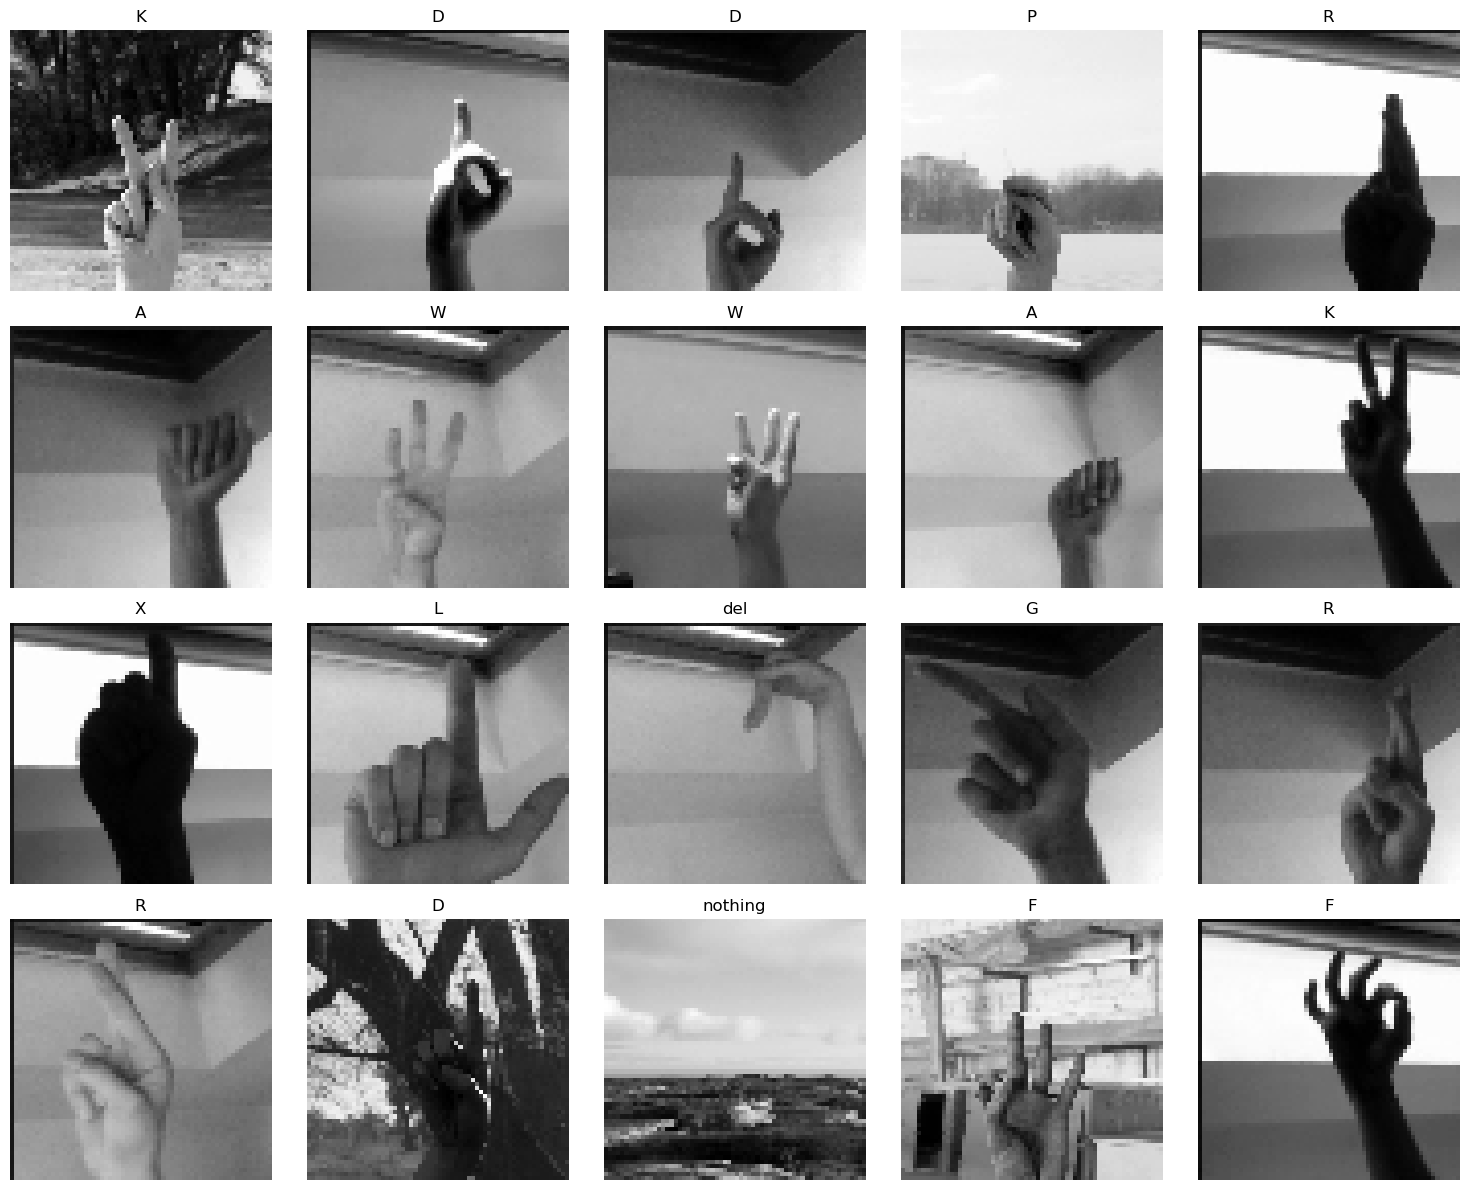

In [71]:
import matplotlib.pyplot as plt

# Numero di immagini da visualizzare
num_images = 20

# Calcola il numero di righe e colonne per il layout del subplot
num_cols = 5
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(15, 3 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[i], cmap='gray')  # Usa 'gray' se le immagini sono in scala di grigi
    plt.title(train_labels[i])
    plt.axis('off')  # Nasconde gli assi

plt.tight_layout()
plt.show()


In [12]:
train_images.shape

(19440, 64, 64)

In [13]:
val_images.shape

(4860, 64, 64)

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [73]:
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [74]:
df = pd.DataFrame(val_labels_encoded,columns=["label"])

In [75]:
df.label.value_counts()

label
4     780
8     780
2     780
20    780
27    780
15    780
14    780
24    780
25    780
13    780
23    780
3     780
10    780
9     780
11    780
19    780
7     780
17    780
6     780
12    780
18    780
16    780
22    780
5     780
1     780
21    780
0     780
26    600
28    600
Name: count, dtype: int64

In [76]:
labels = sorted(set(val_labels)) 

In [49]:
with open("labels2.json", 'w') as file_json:
    json.dump(labels, file_json)

# Numpy

In [83]:
train_images_norm = np.array(train_images)/255
val_images_norm = np.array(val_images)/255
test_images_norm = np.array(test_images)/255

In [20]:
train_images_vectorized = train_images_norm.reshape(len(train_images_norm), -1)
val_images_vectorized = val_images_norm.reshape(len(val_images_norm), -1)
#test_images_vectorized = test_images_norm.reshape(len(test_images_norm), -1)

# Provo a visualizzare i dati 

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

## Pca

In [22]:
pca = PCA(2)  # Specifica il numero di componenti principali desiderati
train_pca = pca.fit_transform(train_images_vectorized)

In [23]:
train_pca.shape

(69600, 2)

In [24]:
train_pca_stable = train_pca[train_labels==1,:]

In [25]:
train_pca_unstable = train_pca[train_labels==0,:]

In [26]:
df = pd.DataFrame(train_pca,columns=["x","y"])

In [27]:
labels = pd.DataFrame(train_labels,columns=["labels"])

In [28]:
df = pd.concat([df,labels],axis=1)

In [29]:
df.shape

(69600, 3)

In [30]:
df.columns

Index(['x', 'y', 'labels'], dtype='object')

In [31]:
df.head()

x         y labels
0 -0.003733 -0.036216      A
1  0.033081  0.021496      Y
2 -0.004233 -0.024579      Z
3  0.021291  0.033344      Z
4  0.018388  0.020552      H

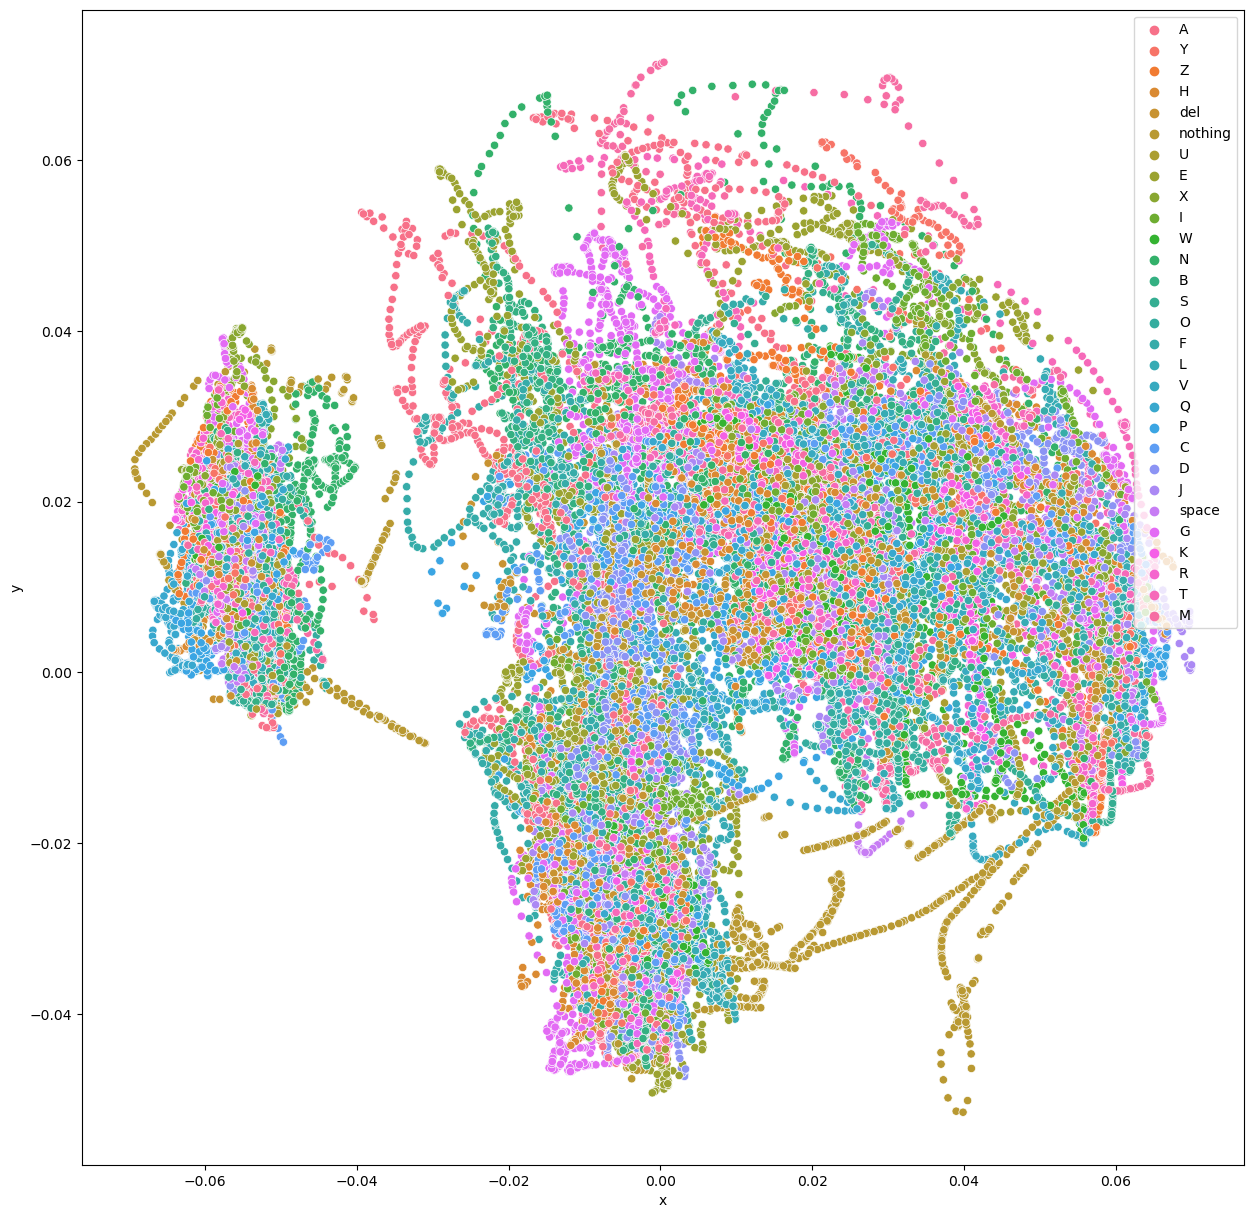

In [33]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df,x="x",y="y", hue='labels')
plt.legend()
plt.show()

## LDA

In [39]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(train_images_vectorized , y_train)

# Tentativo Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf = DecisionTreeClassifier(random_state=42)

# Addestra il modello
clf.fit(train_images_vectorized, train_labels)

# Predice i valori di test
y_pred = clf.predict(train_images_vectorized)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [39]:
y_pred = clf.predict(val_images_vectorized)

In [41]:
accuracy = accuracy_score(val_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


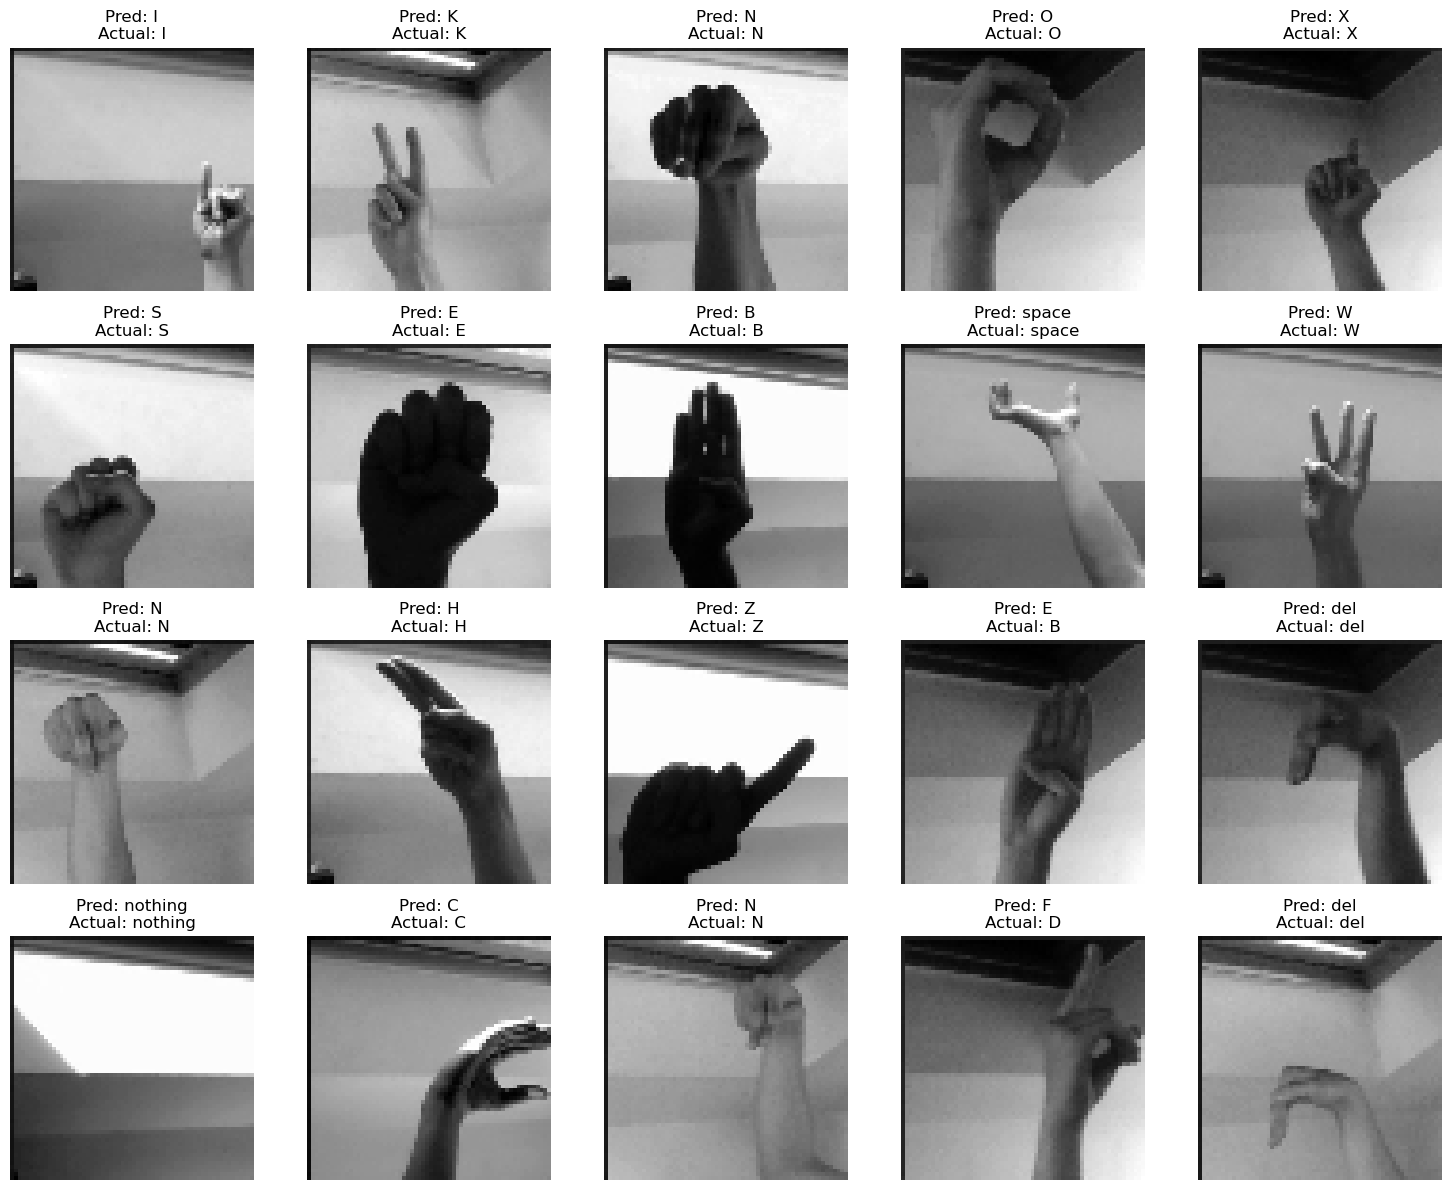

In [44]:
# Numero di immagini da visualizzare
num_images = 20

# Calcola il numero di righe e colonne per il layout del subplot
num_cols = 5
num_rows = (num_images + num_cols - 1) // num_cols

plt.figure(figsize=(15, 3 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(val_images[i], cmap='gray')  # Usa 'gray' se le immagini sono in scala di grigi
    plt.title("Pred: "+y_pred[i]+f"\nActual: {val_labels[i]}")
    plt.axis('off')  # Nasconde gli assi

plt.tight_layout()
plt.show()

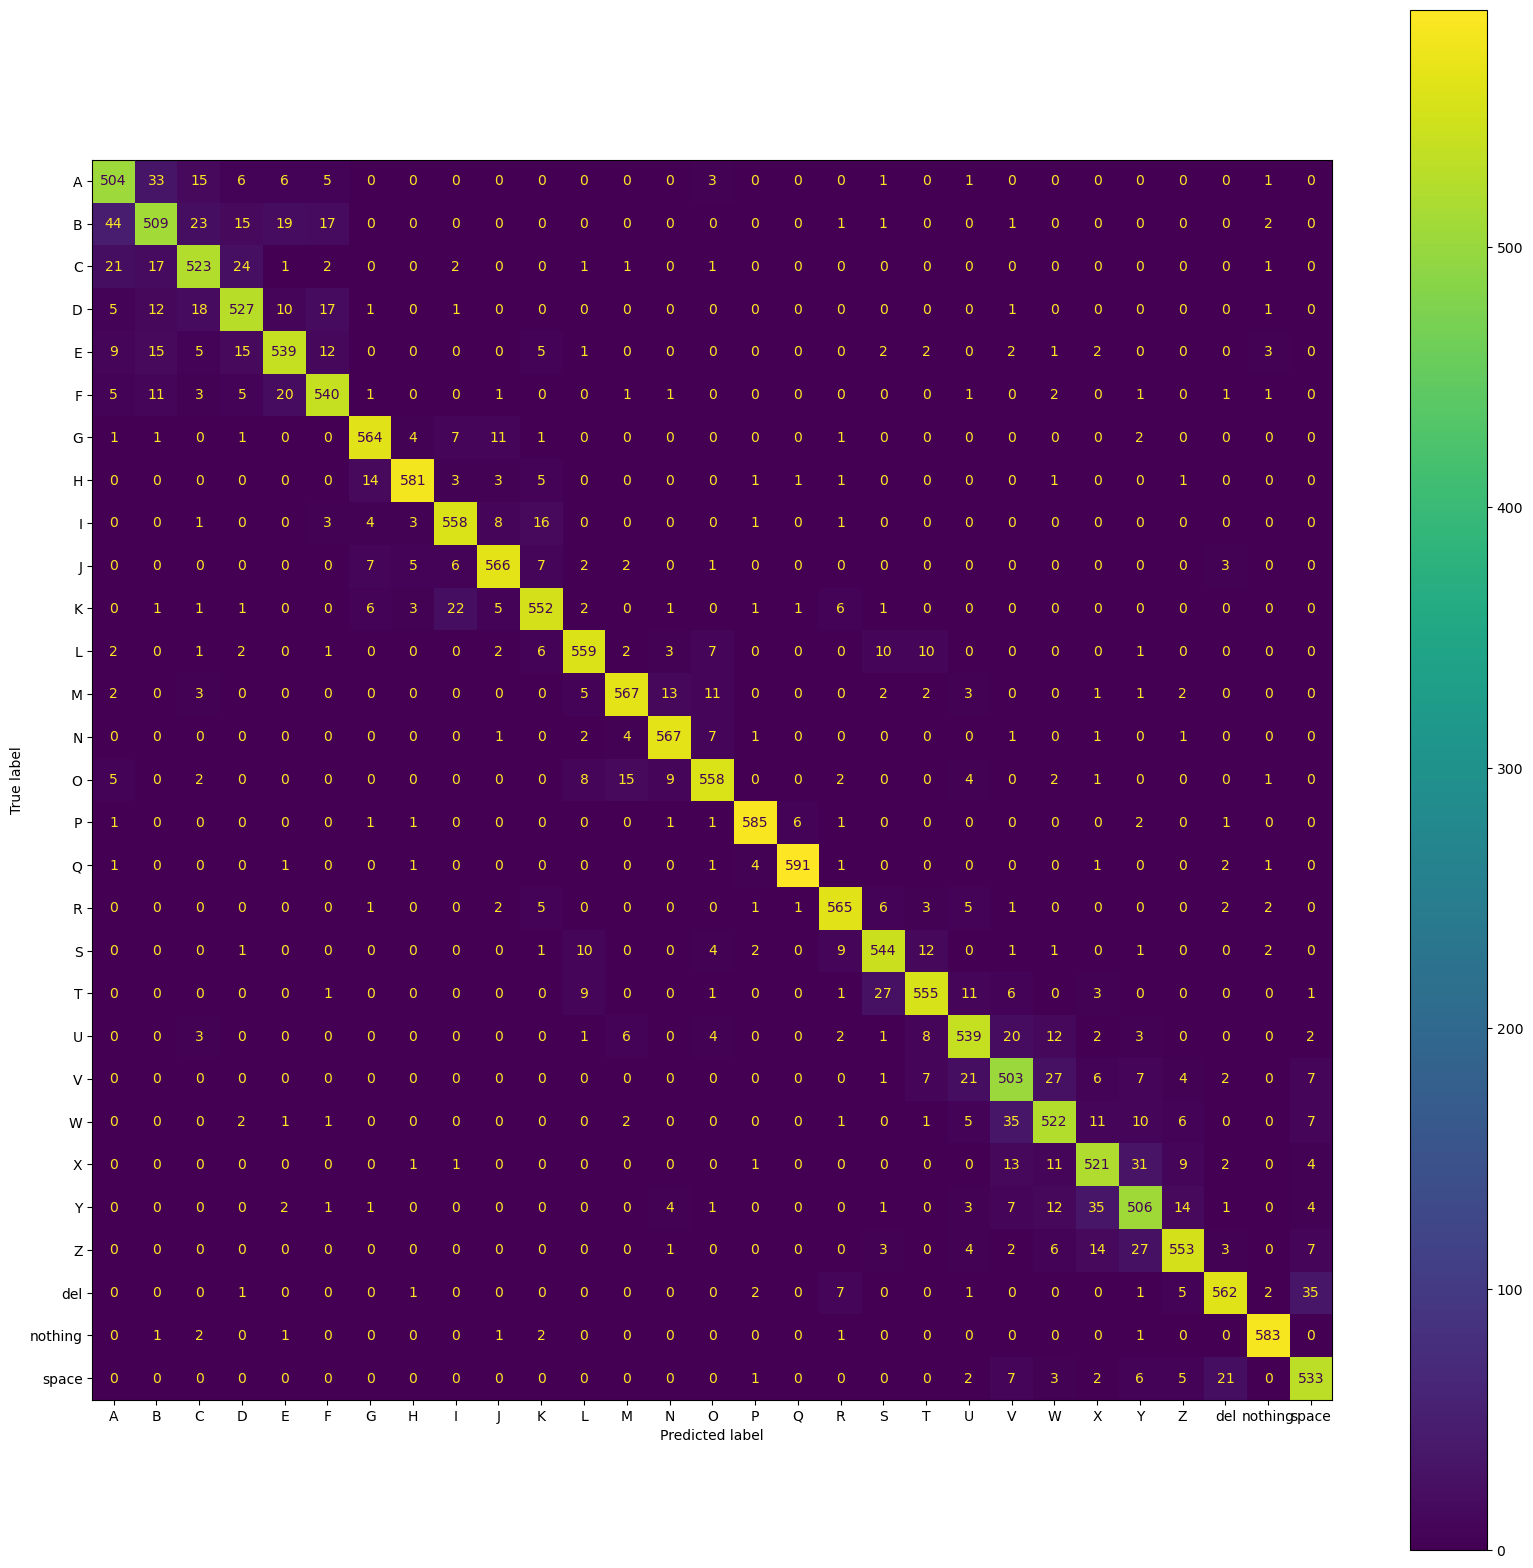

In [71]:
fig,ax=plt.subplots(figsize=(20, 20))
conf_matrix = confusion_matrix(y_pred, val_labels)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=sorted(labels)).plot(ax=ax)
plt.show()

# Tentativo Rete neurale

In [26]:
model = models.Sequential([
    layers.Flatten(input_shape=(64,64)), 
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(29, activation='softmax')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitora la loss sul set di validazione
    patience=10,  # Numero di epoche senza miglioramenti prima di interrompere l'addestramento
    restore_best_weights=True  # Ripristina i pesi migliori del modello
)

In [31]:
model.fit(train_images_norm, train_labels_encoded, epochs=100, batch_size=32,validation_data=(val_images_norm, val_labels_encoded),callbacks=[early_stopping_callback])

Epoch 1/100
608/608 [==============================] - 4s 6ms/step - loss: 3.2785 - accuracy: 0.0442 - val_loss: 3.2199 - val_accuracy: 0.0451
Epoch 2/100
608/608 [==============================] - 4s 7ms/step - loss: 3.0842 - accuracy: 0.0802 - val_loss: 2.8969 - val_accuracy: 0.1350
Epoch 3/100
608/608 [==============================] - 4s 6ms/step - loss: 2.7412 - accuracy: 0.1521 - val_loss: 2.6351 - val_accuracy: 0.1794
Epoch 4/100
608/608 [==============================] - 4s 6ms/step - loss: 2.4576 - accuracy: 0.2298 - val_loss: 2.3407 - val_accuracy: 0.2603
Epoch 5/100
608/608 [==============================] - 4s 6ms/step - loss: 2.2372 - accuracy: 0.2928 - val_loss: 2.3349 - val_accuracy: 0.2656
Epoch 6/100
608/608 [==============================] - 4s 7ms/step - loss: 2.1126 - accuracy: 0.3267 - val_loss: 2.0165 - val_accuracy: 0.3484
Epoch 7/100
608/608 [==============================] - 4s 6ms/step - loss: 1.9928 - accuracy: 0.3620 - val_loss: 1.9831 - val_accuracy: 0.3640

In [39]:
model.save("./Modelli/modello1")

INFO:tensorflow:Assets written to: ./Modelli/modello1/assets


In [29]:
model = tf.keras.models.load_model("./Modelli/modello1")

2024-06-12 13:02:49.837305: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 16ms/step


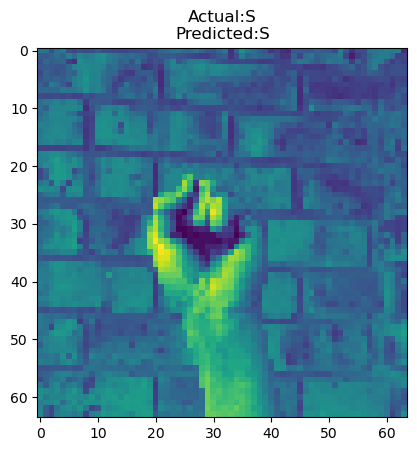

In [38]:
img=val_images_norm[0:1]
label = model.predict(img)
index=np.argmax(label)
plt.imshow(val_images[0])
plt.title(f"Actual:{val_labels[0]}\nPredicted:{labels[index]}")
plt.show()

In [40]:
img=test_images_norm[3:4]
label = model.predict(img)
index=np.argmax(label)
plt.imshow(test_images[2])
plt.title(f"Actual:{test_labels[2]}\nPredicted:{labels[index]}")
plt.show()

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

# Tentativo PCA+Rete Neurale

In [77]:
pca = PCA(0.9)  # Specifica il numero di componenti principali desiderati
train_pca = pca.fit_transform(train_images_vectorized)

In [86]:
val_pca = pca.transform(val_images_vectorized)

In [79]:
train_pca.shape

(69600, 40)

In [80]:
model_2 = models.Sequential([
    layers.Dense(40, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(29, activation='softmax')
])

In [81]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitora la loss sul set di validazione
    patience=3,  # Numero di epoche senza miglioramenti prima di interrompere l'addestramento
    restore_best_weights=True  # Ripristina i pesi migliori del modello
)

In [85]:
model_2.fit(train_pca, train_labels_encoded, epochs=100,validation_data=[val_pca,val_labels_encoded],callbacks=[early_stopping_callback])

Epoch 1/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.8728 - accuracy: 0.1518 - val_loss: 2.6318 - val_accuracy: 0.1968
Epoch 2/100
2175/2175 [==============================] - 2s 924us/step - loss: 2.4270 - accuracy: 0.2547 - val_loss: 2.2655 - val_accuracy: 0.2928
Epoch 3/100
2175/2175 [==============================] - 2s 933us/step - loss: 2.1176 - accuracy: 0.3390 - val_loss: 1.9879 - val_accuracy: 0.3706
Epoch 4/100
2175/2175 [==============================] - 2s 951us/step - loss: 1.8738 - accuracy: 0.4103 - val_loss: 1.7685 - val_accuracy: 0.4369
Epoch 5/100
2175/2175 [==============================] - 2s 937us/step - loss: 1.6659 - accuracy: 0.4744 - val_loss: 1.5732 - val_accuracy: 0.5007
Epoch 6/100
2175/2175 [==============================] - 2s 936us/step - loss: 1.4953 - accuracy: 0.5261 - val_loss: 1.4140 - val_accuracy: 0.5466
Epoch 7/100
2175/2175 [==============================] - 2s 967us/step - loss: 1.3609 - accuracy: 0.5657 - val_loss: 1.2

# Tentativo 2 PCA+Rete Neurale

In [87]:
pca = PCA(0.8)  # Specifica il numero di componenti principali desiderati
train_pca = pca.fit_transform(train_images_vectorized)

In [88]:
val_pca = pca.transform(val_images_vectorized)

In [89]:
train_pca.shape

(69600, 12)

In [91]:
model_3 = models.Sequential([
    layers.Dense(12, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(29, activation='softmax')
])

In [92]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitora la loss sul set di validazione
    patience=3,  # Numero di epoche senza miglioramenti prima di interrompere l'addestramento
    restore_best_weights=True  # Ripristina i pesi migliori del modello
)

In [94]:
model_3.fit(train_pca, train_labels_encoded, epochs=100,validation_data=[val_pca,val_labels_encoded],callbacks=[early_stopping_callback])

Epoch 1/100
2175/2175 [==============================] - 2s 938us/step - loss: 3.0970 - accuracy: 0.1098 - val_loss: 2.9551 - val_accuracy: 0.1334
Epoch 2/100
2175/2175 [==============================] - 2s 871us/step - loss: 2.8759 - accuracy: 0.1574 - val_loss: 2.7928 - val_accuracy: 0.1772
Epoch 3/100
2175/2175 [==============================] - 2s 872us/step - loss: 2.6907 - accuracy: 0.1992 - val_loss: 2.5790 - val_accuracy: 0.2203
Epoch 4/100
2175/2175 [==============================] - 2s 878us/step - loss: 2.4841 - accuracy: 0.2493 - val_loss: 2.3827 - val_accuracy: 0.2689
Epoch 5/100
2175/2175 [==============================] - 2s 895us/step - loss: 2.3021 - accuracy: 0.2941 - val_loss: 2.2220 - val_accuracy: 0.3101
Epoch 6/100
2175/2175 [==============================] - 2s 886us/step - loss: 2.1585 - accuracy: 0.3287 - val_loss: 2.0911 - val_accuracy: 0.3464
Epoch 7/100
2175/2175 [==============================] - 2s 894us/step - loss: 2.0428 - accuracy: 0.3605 - val_loss: 1

forse la varianza rappresentata non è abbastanza

# Tuning degli iperparametri

In [95]:
pca = PCA(0.90)  # Specifica il numero di componenti principali desiderati
train_pca = pca.fit_transform(train_images_vectorized)

In [96]:
val_pca = pca.transform(val_images_vectorized)

In [180]:
model_3_pca = models.Sequential([
    layers.Dense(40, activation='tanh'),
    layers.Dense(256, activation='relu6'),
    layers.Dense(29, activation='softmax')
])

In [181]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitora la loss sul set di validazione
    patience=3,  # Numero di epoche senza miglioramenti prima di interrompere l'addestramento
    restore_best_weights=True  # Ripristina i pesi migliori del modello
)

In [100]:
from bayes_opt import BayesianOptimization
def create_model(dense_units1,learning_rate):
    model = models.Sequential([
        layers.Dense(111, activation='tanh'),
        layers.Dense(int(dense_units1), activation='relu6'),
        layers.Dense(29, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def objective(dense_units1, learning_rate):
    model = create_model(dense_units1,learning_rate)
    
    history = model.fit(train_pca, train_labels_encoded,
                        validation_data=(val_pca, val_labels_encoded),
                        epochs=10,
                        batch_size=32,verbose=0)
    
    val_accuracy = max(history.history['val_accuracy'])
    return val_accuracy

# Imposta i parametri di ricerca
pbounds = {
    'learning_rate':(0.0001,0.001),
    'dense_units1': (128, 512),
    
    
}
optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=42,
)

# Avvia l'ottimizzazione
optimizer.maximize(init_points=5, n_iter=10)

# Visualizza i migliori parametri trovati
print("Best hyperparameters: ", optimizer.max)

|   iter    |  target   | dense_... | learni... |
-------------------------------------------------
| 1         | 0.7912    | 271.8     | 0.0009556 |
| 2         | 0.7388    | 409.1     | 0.0006388 |
| 3         | 0.4054    | 187.9     | 0.0002404 |
| 4         | 0.7003    | 150.3     | 0.0008796 |
| 5         | 0.7661    | 358.8     | 0.0007373 |
| 6         | 0.4602    | 270.4     | 0.0002659 |
| 7         | 0.7995    | 271.9     | 0.0009935 |
| 8         | 0.7466    | 273.6     | 0.000761  |
| 9         | 0.7859    | 357.1     | 0.0008424 |
| 10        | 0.4278    | 355.3     | 0.0002092 |
| 11        | 0.6643    | 360.6     | 0.0005015 |
| 12        | 0.6979    | 407.4     | 0.0005044 |
| 13        | 0.572     | 410.8     | 0.0003348 |
| 14        | 0.6891    | 357.9     | 0.0005404 |
| 15        | 0.7152    | 274.9     | 0.0006968 |
Best hyperparameters:  {'target': 0.7995402216911316, 'params': {'dense_units1': 271.9272824639362, 'learning_rate': 0.0009935486153941585}}


In [102]:
model_1 = create_model(optimizer.max["params"]["dense_units1"],optimizer.max["params"]["learning_rate"])

In [103]:
model_1.fit(train_pca, train_labels_encoded, epochs=100, batch_size=32,validation_data=(val_pca, val_labels_encoded),callbacks=[early_stopping_callback])

Epoch 1/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.7025 - accuracy: 0.1957 - val_loss: 2.3179 - val_accuracy: 0.2817
Epoch 2/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.0572 - accuracy: 0.3579 - val_loss: 1.8320 - val_accuracy: 0.4222
Epoch 3/100
2175/2175 [==============================] - 3s 1ms/step - loss: 1.6657 - accuracy: 0.4754 - val_loss: 1.5155 - val_accuracy: 0.5236
Epoch 4/100
2175/2175 [==============================] - 3s 1ms/step - loss: 1.3876 - accuracy: 0.5591 - val_loss: 1.2832 - val_accuracy: 0.5930
Epoch 5/100
2175/2175 [==============================] - 3s 1ms/step - loss: 1.1842 - accuracy: 0.6231 - val_loss: 1.0986 - val_accuracy: 0.6529
Epoch 6/100
2175/2175 [==============================] - 2s 1ms/step - loss: 1.0363 - accuracy: 0.6686 - val_loss: 0.9720 - val_accuracy: 0.6965
Epoch 7/100
2175/2175 [==============================] - 3s 1ms/step - loss: 0.9181 - accuracy: 0.7088 - val_loss: 0.8723 - val_ac

In [105]:
model_1.save("./Modelli/PCA_NN")

INFO:tensorflow:Assets written to: ./Modelli/PCA_NN/assets


# CNN copiata

In [78]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [41]:
train_images_norm_r = train_images_norm.reshape(-1, 64, 64, 1)
val_images_norm_r = val_images_norm.reshape(-1, 64, 64, 1)

In [91]:
model = Sequential()

model = models.Sequential()
# 1st convolution layer
model.add(Conv2D(8, kernel_size=(2, 2), activation='relu', padding='same', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# fully-connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 8)         40        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 21, 21, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 21, 21, 8)        32        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 21, 21, 8)         0         
                                                                 
 flatten_7 (Flatten)         (None, 3528)              0         
                                                                 
 dense_15 (Dense)            (None, 256)             

In [93]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

prima_addestrato con adam e poi con sgd strano

In [46]:
train_images_norm.shape

(19440, 64, 64)

In [94]:
model.fit(train_images_norm, train_labels_encoded, epochs=100, batch_size=64,validation_data=(val_images_norm, val_labels_encoded),callbacks=[early_stopping_callback],shuffle=True)

Epoch 1/100
1392/1392 [==============================] - 41s 29ms/step - loss: 1.4349 - accuracy: 0.5691 - val_loss: 0.8678 - val_accuracy: 0.7351
Epoch 2/100
1392/1392 [==============================] - 32s 23ms/step - loss: 0.6735 - accuracy: 0.7865 - val_loss: 0.7592 - val_accuracy: 0.7727
Epoch 3/100
1392/1392 [==============================] - 30s 21ms/step - loss: 0.5032 - accuracy: 0.8377 - val_loss: 0.4859 - val_accuracy: 0.8482
Epoch 4/100
1392/1392 [==============================] - 30s 21ms/step - loss: 0.4057 - accuracy: 0.8688 - val_loss: 0.3883 - val_accuracy: 0.8791
Epoch 5/100
1392/1392 [==============================] - 30s 22ms/step - loss: 0.3548 - accuracy: 0.8849 - val_loss: 0.3733 - val_accuracy: 0.8816
Epoch 6/100
1392/1392 [==============================] - 30s 21ms/step - loss: 0.3157 - accuracy: 0.8978 - val_loss: 0.2688 - val_accuracy: 0.9200
Epoch 7/100
1392/1392 [==============================] - 30s 21ms/step - loss: 0.2824 - accuracy: 0.9089 - val_loss: 0

In [95]:
model.save("./Modelli/cnn_3")

INFO:tensorflow:Assets written to: ./Modelli/cnn_3/assets


INFO:tensorflow:Assets written to: ./Modelli/cnn_3/assets


In [130]:
model = models.load_model("./Modelli/cnn")

In [131]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 8)         40        
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 21, 21, 8)        0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 21, 21, 8)        32        
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 21, 21, 8)         0         
                                                                 
 flatten_13 (Flatten)        (None, 3528)              0         
                                                                 
 dense_26 (Dense)            (None, 128)             

# Altro tentativo

In [142]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_edge_detection_to_array(images):
    # Array per memorizzare le immagini elaborate
    processed_images = []

    # Iterare attraverso tutte le immagini nell'array
    for img in images:
        # Applicare il filtro di Sobel
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Rileva bordi orizzontali
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Rileva bordi verticali
        sobel_combined = cv2.magnitude(sobelx, sobely)

        # Normalizzare l'immagine Sobel combinata
        sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX)
        sobel_combined = np.uint8(sobel_combined)

        # Aggiungere l'immagine elaborata all'array
        processed_images.append(sobel_combined)

    return processed_images

In [144]:
processed_images = apply_edge_detection_to_array(train_images)
val_processed_images = apply_edge_detection_to_array(val_images)

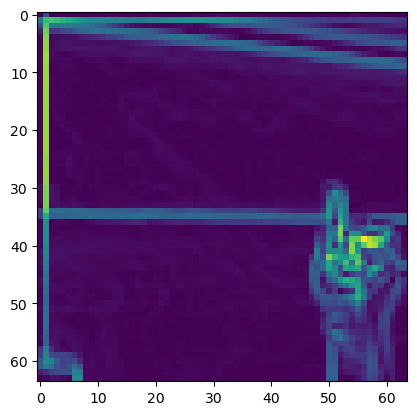

In [145]:
plt.imshow(val_processed_images[0])

In [147]:
processed_images_norm = np.array(processed_images)/255 
val_processed_images_norm = np.array(val_processed_images)/255

In [149]:
model = Sequential()

model = models.Sequential()
# 1st convolution layer
model.add(Conv2D(8, kernel_size=(2, 2), activation='relu', padding='same', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# fully-connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 8)         40        
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 21, 21, 8)        0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 21, 21, 8)        32        
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 21, 21, 8)         0         
                                                                 
 flatten_16 (Flatten)        (None, 3528)              0         
                                                                 
 dense_32 (Dense)            (None, 128)             

In [151]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
model.fit(processed_images_norm, train_labels_encoded, epochs=100, batch_size=32,validation_data=(val_processed_images_norm, val_labels_encoded),callbacks=[early_stopping_callback],shuffle=True)

Epoch 1/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.8852 - accuracy: 0.7195 - val_loss: 0.3443 - val_accuracy: 0.8811
Epoch 2/100
2175/2175 [==============================] - 24s 11ms/step - loss: 0.2525 - accuracy: 0.9115 - val_loss: 0.3615 - val_accuracy: 0.8791
Epoch 3/100
2175/2175 [==============================] - 25s 11ms/step - loss: 0.1697 - accuracy: 0.9405 - val_loss: 0.2285 - val_accuracy: 0.9229
Epoch 4/100
2175/2175 [==============================] - 24s 11ms/step - loss: 0.1357 - accuracy: 0.9526 - val_loss: 0.0682 - val_accuracy: 0.9771
Epoch 5/100
2175/2175 [==============================] - 24s 11ms/step - loss: 0.1134 - accuracy: 0.9603 - val_loss: 0.2368 - val_accuracy: 0.9226
Epoch 6/100
2175/2175 [==============================] - 24s 11ms/step - loss: 0.0992 - accuracy: 0.9660 - val_loss: 0.0807 - val_accuracy: 0.9705
Epoch 7/100
2175/2175 [==============================] - 24s 11ms/step - loss: 0.0941 - accuracy: 0.9678 - val_loss: 0

In [154]:
model.save("./Modelli/cnn_filter")

INFO:tensorflow:Assets written to: ./Modelli/cnn_filter/assets


INFO:tensorflow:Assets written to: ./Modelli/cnn_filter/assets


# Tentativo ulteriore

Elaborazione delle immagini:   0%|          | 0/69395 [00:00<?, ?it/s]

skip


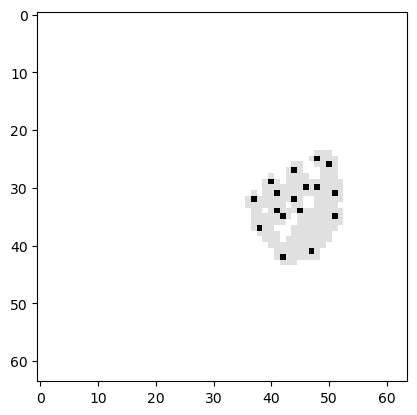

Elaborazione delle immagini:   0%|          | 1/69395 [00:00<3:06:46,  6.19it/s]


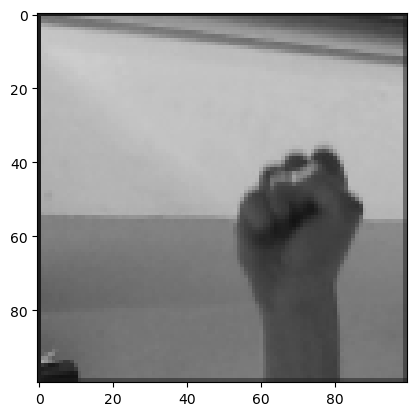

In [66]:
import cv2
import mediapipe as mp
import numpy as np

# Inizializza Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

def process_images_with_mediapipe(images):
    landmarks_list = []

    for img in tqdm(images, desc="Elaborazione delle immagini"):
        white_img = np.ones((64, 64, 3), dtype=np.uint8) * 255

        # Convert the white image to RGB
        white_img_rgb = cv2.cvtColor(white_img, cv2.COLOR_BGR2RGB)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
      
        # Processa l'immagine e trova la mano dominante
        result = hands.process(img_rgb)
        
        
        
        if result.multi_hand_landmarks:
            hand_landmarks = result.multi_hand_landmarks[0]  # Estrai solo i landmarks della mano dominante
            # Estrai le coordinate x e y dei punti di riferimento delle mani
            landmarks = []
            for lm in hand_landmarks.landmark:
                landmarks.append(lm.x)
                landmarks.append(lm.y)
            skeleton_img = white_img.copy()
            
            # Draw the hand skeleton on the white image
            mp_drawing.draw_landmarks(skeleton_img, hand_landmarks, mp_hands.HAND_CONNECTIONS, landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=1, circle_radius=0))
            plt.imshow(skeleton_img)
            plt.show()
            plt.imshow(img_rgb)
            break
        else:
            print("skip")
            landmarks =  np.zeros(42)
        landmarks_list.append(landmarks)
        
       
    return landmarks_list

# Generare dati di esempio (5 immagini casuali in bianco e nero 64x64)
# Sostituisci questo con il tuo array di immagini reali

# Processare le immagini e ottenere i landmarks
#train_images_landmarks = process_images_with_mediapipe(train_images)
train_images_landmarks = process_images_with_mediapipe(train_images[205:])

# Stampa i landmarks per ciascuna immagine


# Chiudi Mediapipe Hands
hands.close()


In [67]:
train_labels[205]

'I'

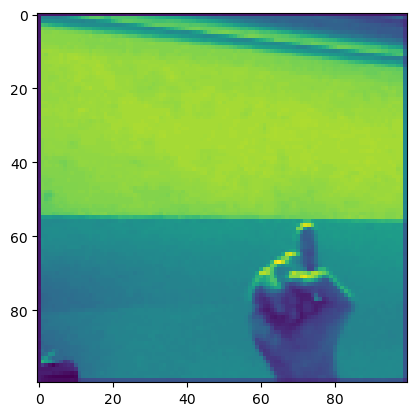

In [68]:
plt.imshow(train_images[205])

In [ ]:
len(train_images_landmarks.shape)

In [80]:
train_images_landmarks_np = np.array(train_images_landmarks)

In [21]:
val_images_landmarks_np = np.array(val_images)

In [81]:
train_images_landmarks_np.shape

(69600, 42)

In [22]:
val_images_landmarks_np.shape

(17400, 42)

In [213]:
np.save("train_images_landmarks", train_images_landmarks_np)

In [26]:
np.save("val_images_landmarks", val_images_landmarks_np)

In [37]:
train_images_landmarks_np=np.load("train_images_landmarks.npy")

In [83]:
train_images_landmarks_np[0]

array([0.64077324, 0.68787396, 0.72849309, 0.62685215, 0.79078263,
       0.53201932, 0.78987843, 0.4420549 , 0.79031008, 0.36924857,
       0.72076678, 0.45893249, 0.72077107, 0.38587576, 0.72549152,
       0.44992799, 0.72969121, 0.51280874, 0.65986562, 0.47258261,
       0.66579717, 0.41013584, 0.67595297, 0.49417809, 0.68337524,
       0.5600186 , 0.60127807, 0.49429446, 0.60886896, 0.4385711 ,
       0.62949568, 0.52209014, 0.64254546, 0.58377373, 0.53896821,
       0.52569449, 0.55265296, 0.46909118, 0.58083701, 0.5245406 ,
       0.59682   , 0.57169175])

In [85]:
model_landmarks = models.Sequential([
    layers.Dense(42, activation='relu'),
    layers.Dense(256, activation='relu'),
     layers.Dense(256, activation='relu'),
    layers.Dense(29, activation='softmax')
])

In [86]:
model_landmarks.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model_landmarks.fit(train_images_landmarks_np, train_labels_encoded, epochs=100, batch_size=32,validation_data=(val_images_landmarks_np, val_labels_encoded),callbacks=[early_stopping_callback])

Epoch 1/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.9536 - accuracy: 0.1536 - val_loss: 2.7674 - val_accuracy: 0.2091
Epoch 2/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.7985 - accuracy: 0.1978 - val_loss: 2.7324 - val_accuracy: 0.2314
Epoch 3/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.7724 - accuracy: 0.2055 - val_loss: 2.7213 - val_accuracy: 0.2353
Epoch 4/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.7561 - accuracy: 0.2097 - val_loss: 2.7237 - val_accuracy: 0.2263
Epoch 5/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.7442 - accuracy: 0.2157 - val_loss: 2.7105 - val_accuracy: 0.2332
Epoch 6/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.7355 - accuracy: 0.2173 - val_loss: 2.7136 - val_accuracy: 0.2362
Epoch 7/100
2175/2175 [==============================] - 3s 1ms/step - loss: 2.7306 - accuracy: 0.2191 - val_loss: 2.6930 - val_ac

In [84]:
clf = DecisionTreeClassifier(random_state=42)

# Addestra il modello
clf.fit(train_images_landmarks_np, train_labels)

# Predice i valori di test
y_pred = clf.predict(train_images_landmarks_np)

# Calcola l'accuratezza del modello
accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.25
